In [2]:
library(stringr)
library(ggplot2)
library(dplyr)
library(reshape2)

theme_set(theme_minimal())
theme_update(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
theme_update(text = element_text(size = 17))

convert_samplenames = function(here){
    here %>% substring(3,3) -> plate
    here %>% str_sub(-1,-1) %>% gsub("1","",.) %>% gsub("2",".2",.) -> duplicate
    here %>% gsub("-",".",.) %>% str_sub(5,-2) %>% paste0(.,duplicate,"X19",plate) %>% 
    return
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
phar <- read.table("../data/PhARscores_dolphyn_pepsyn.csv", sep = ",", header = TRUE)

# compare!!! DolphynLa_001_Universal with PhageScan_PeptideAnno.tsv
If different: Adjust random seeds in RF, make sure probabilities are also same!

In [16]:
anno_pep = read.table("../data/PhageScan_PeptideAnno.tsv", header = TRUE, sep = "\t", row.names = 2, stringsAsFactors=FALSE)

# Hit Foldchange Data
fc194 <- read.table("../data/phipseq_0194_DolphynLa_001_Hits_foldchange.tsv", header=TRUE, row.names = 1)
fc195 <- read.table("../data/phipseq_0195_DolphynLa_001_Hits_foldchange.tsv", header=TRUE, row.names = 1)

cbind(fc194, fc195) %>% select(!contains("BEADS_ONLY")) -> fc
fc[rownames(anno_pep),] %>% log() -> lfc_org

# cleaning up sample names
anno_samples = data.frame(org = colnames(lfc_org))
anno_samples = cbind(anno_samples, str_split_fixed(anno_samples$org, "\\.",4))
anno_samples$sampleID = anno_samples$`4`
anno_samples %>% mutate(sampleID = gsub("Pre.Therapy_.", "", sampleID)) %>% mutate(sampleID = gsub(".20A20G.1", "", sampleID)) %>% 
                mutate(sampleID = gsub(".20A20G", "", sampleID)) %>% mutate(sampleID = gsub("VRC.", "", sampleID)) %>% 
                mutate(sampleID = gsub("IBD.Control.", "", sampleID)) %>% mutate(sampleID = gsub("_", "", sampleID)) -> anno_samples
colnames(lfc_org) = paste0(anno_samples$sampleID,anno_samples$`1`)

In [29]:
dim(fc)

[1] 48464   177

In [23]:
cbind(fc194, fc195) %>% select(!contains("BEADS_ONLY")) -> fc
fc#[rownames(anno_pep),] 

,X194.Helmsley.Crohns.Pre.Therapy_.SMART003.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART014.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART028.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART030.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART036.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART048.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART050.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART051.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART066.20A20G.1,X194.Helmsley.Crohns.Pre.Therapy_.SMART078.20A20G.1,⋯,X195.VRC.Control.VRC.S3.0652.01.20A20G.1,X195.VRC.Control.VRC.S3.0662.01.20A20G.1,X195.VRC.Control.VRC.S3.0693.01.20A20G.1,X195.VRC.Control.VRC.S3.0719.01.20A20G.1,X195.VRC.Control.VRC.S3.0720.01.20A20G.1,X195.VRC.Control.VRC.S3.0723.01.20A20G.1,X195.VRC.Control.VRC.S3.0736.01.20A20G.1,X195.VRC.Control.VRC.SO.0456.01.20A20G.1,X195.VRC.Control.VRC.SO.0479.01.20A20G.1,X195.VRC.Crohns.Pre.Therapy_.SMART397_.20A20G.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DolphynLa_001_GGTCTGGGCTGGGTACAGCGCGACCGTAGACTGGCAAGTCAGAAAGGTGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_GCTTCATGGCGGGAGAATCGTCATTACCCCCAGCGTATTCTACGCGGGGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_GACGAGATCATCAAGGGCAAATGGGGTAGTAACCCGGAACGCCGTGGAGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_AAAAATTCAGAAAACAAATACTTCCTGAAAGTGTATAAATACATTGGCGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_CGTGAGATTATGGAACGCCGCCACCTGGACATGGAAGATTGGAAGGGTGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_GCTGGAAACTGGATGTATGCATGGTGGAAAAGCGACCGCAAACATGGAGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_CATTACGTGTGGCAGACGACTAAGAATCGGCGCTGGTTCGGTCCCGGTGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_GAATTGAGACGTTGGTTTGGAAGAAGAGCCGTTGAGAAACCTTTTGGTGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1
DolphynLa_001_CCGGTATTGGAAAAGGACTTCCATTTTTCAGGATCAGACTGGAATGGTGG,1,1.00,1.00,1,1,1.00,1,1,1.00,1.00,⋯,1,1.00,1.00,1,1,1,1,1,1,1


In [10]:
phar %>% subset(library == "pepsyn_7") %>% 
group_by(sample) %>% summarise_at(vars(vir_score), list(max = max)) %>%
arrange(desc(max)) %>% head(4) %>% select(sample) %>% unique %>% 
sapply(convert_samplenames) %>% as.list %>% unlist -> top_score_sample

In [11]:
top_score_sample

[1] "S3.0693.01X195"   "S3.0153.01X194"   "SO.0491.01X194"   "S3.0693.01.2X194"

In [13]:
anno_pep %>% 
select(pep_id, sublibrary,pep_aa) %>% subset(sublibrary == "dolphin") %>%
mutate(pep1 = str_split(pep_aa, "GGGGS", simplify=TRUE)[,1])%>%
mutate(pep2 = str_split(pep_aa, "GGGGS", simplify=TRUE)[,2])%>%
mutate(pep3 = gsub("\\*","",str_split(pep_aa, "GGGGS", simplify=TRUE)[,3],)) %>%
melt(id.vars = c("pep_id","sublibrary","pep_aa"), value.name = "sub_aa", variable.name = "pep_no") %>%
merge(anno_pep %>% subset(sublibrary == "dolphinepitopes") %>% mutate(pep_aa = str_sub(pep_aa,6,20)) %>% select(pep_id,pep_aa),
      by.x="sub_aa", by.y = "pep_aa") -> dol_epi_map

In [14]:
rbind(dol_epi_map %>% select(pep_id.x) %>% unique() %>% rename(triplet_id = pep_id.x) %>% mutate(pep_id = triplet_id) %>% mutate(pep_no = "triplet"),
      dol_epi_map %>% select(pep_id.y, pep_id.x, pep_no) %>% rename(pep_id = pep_id.y) %>% rename(triplet_id = pep_id.x)) -> dol_epi_map

In [17]:
lfc_org %>% select(all_of(top_score_sample)) %>% tibble::rownames_to_column("pep_id2") %>% 
melt(id.vars = "pep_id2", value.name="lfc", variable.name = "sample") -> tdf
anno_pep %>% select(c("sublibrary", "pro_id", "pep_id", "taxon_id")) %>% 
subset(sublibrary != "pepsyn") %>% tibble::rownames_to_column("pep_id2") %>% 
merge(tdf) %>% mutate(across(where(is.factor), as.character)) -> tdf 

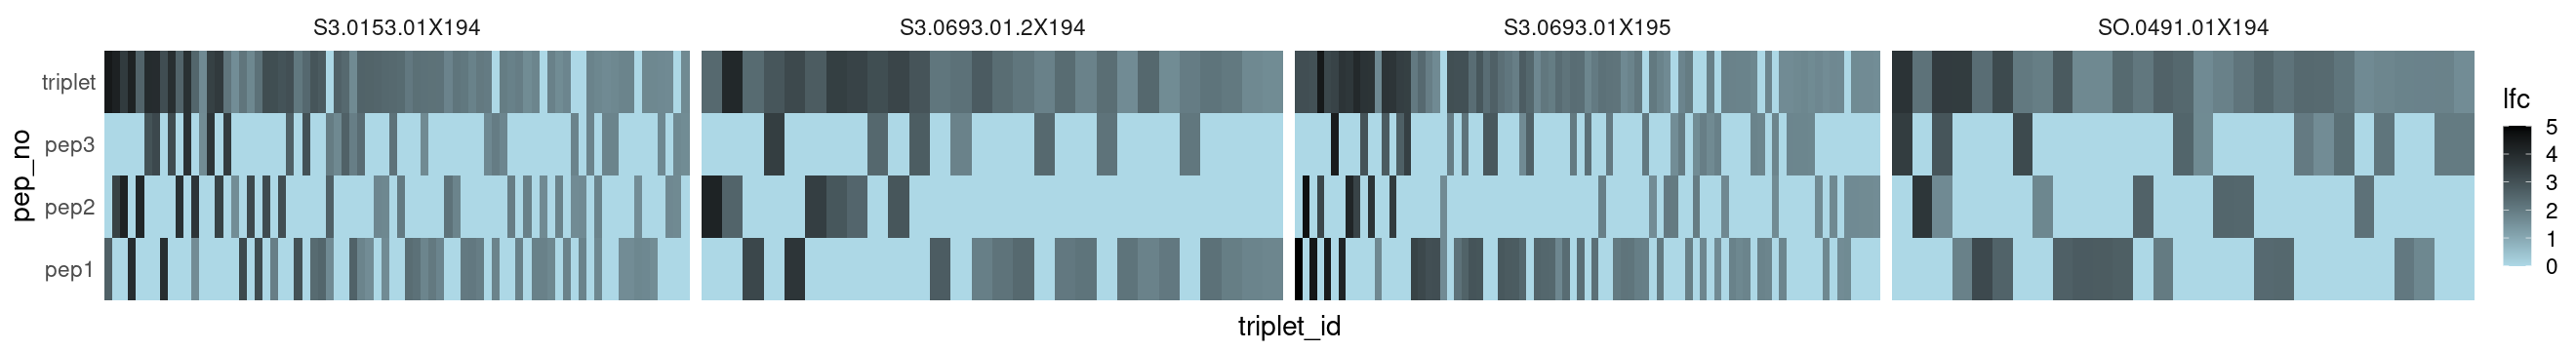

In [21]:
options(repr.plot.width=22, repr.plot.height=3)

merge(dol_epi_map,tdf) %>% mutate(tripletSample = paste(triplet_id,sample)) %>% 
select(taxon_id,pro_id,lfc,pep_no,tripletSample) %>%
mutate(lfc_bin = lfc >0) %>%
group_by(tripletSample) %>% summarise_at(vars(lfc_bin), list(sum=sum)) %>%
subset(sum>1) %>% select(tripletSample) %>% unlist() -> positive_triplets

merge(dol_epi_map,tdf) %>% mutate(tripletSample = paste(triplet_id,sample)) %>% 
select(taxon_id,pro_id,lfc,pep_no,triplet_id,tripletSample, sample) %>%
subset(tripletSample %in% positive_triplets) %>% 
mutate(lfc_bin = lfc >0) %>%
arrange(desc(lfc_bin), desc(lfc)) %>% 
mutate(triplet_id = factor(triplet_id, levels = unique(triplet_id))) %>%

ggplot(aes(triplet_id,pep_no)) + geom_tile(aes(fill = lfc)) + scale_fill_gradient(low = "lightblue", high = "black") + 
theme(axis.text.x=element_blank(), panel.grid.major.x = element_blank(), panel.grid.major.y = element_blank()) +
facet_grid(.~sample, scales= "free")

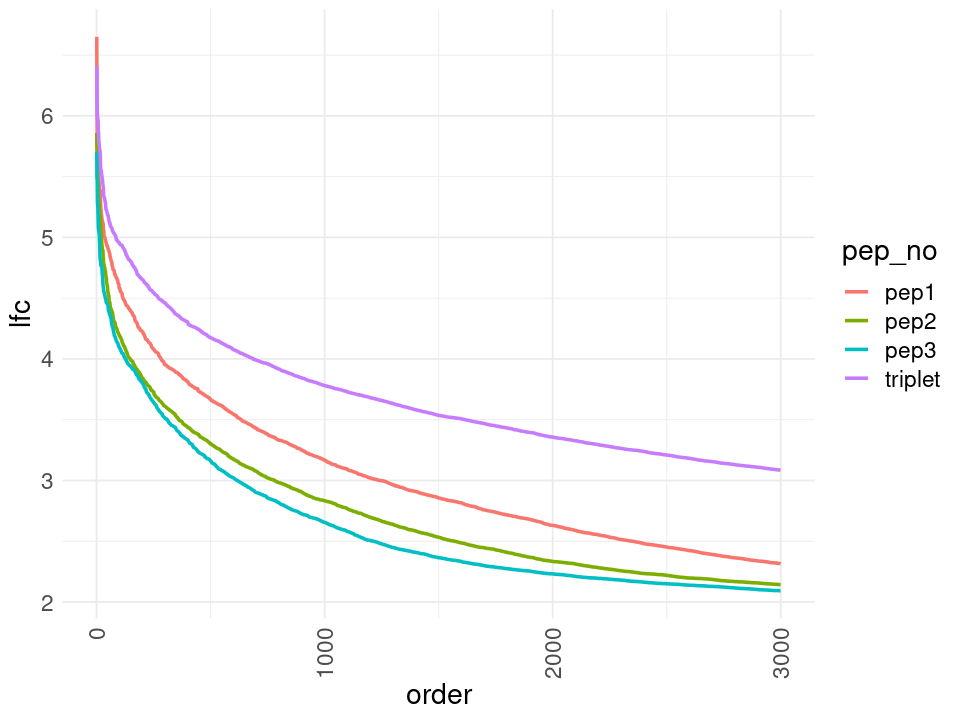

In [25]:
options(repr.plot.width=8, repr.plot.height=6)

lfc_org %>% tibble::rownames_to_column("pep_id2") %>%
merge(anno_pep %>% select(c("sublibrary", "pro_id", "pep_id", "taxon_id"))%>% tibble::rownames_to_column("pep_id2")) %>%
subset(sublibrary != "pepsyn") %>% merge(dol_epi_map) %>% 
melt(id.vars = c("sublibrary", "pro_id", "pep_id", "taxon_id","pep_id2","triplet_id","pep_no"), value.name="lfc", variable.name = "sample") %>% 
mutate(tripletSample = paste(triplet_id,sample)) %>% 

subset(lfc>0) %>% arrange(desc(lfc)) %>% group_by(pep_no) %>% mutate(order = row_number()) %>%
subset(order < 3000) %>%

ggplot(aes(order, lfc, color = pep_no)) + geom_line(size = 1)